# Programming and Business Analytics

> Introduction

Kuo, Yao-Jen from [DATAINPOINT](https://www.datainpoint.com/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## TL; DR

> In this lecture, we will walk through the "what and why" about programming and business analytics. Moreoever, a brief introduction to the programming language we will cover in the coming courses: Python.

## What is programming and business analytics

## This is just a fancy word for modern data science in order to confuse you.

## So what is modern data science?

> Modern data science is a huge field, it invovles applications and tools like importing, tidying, transformation, visualization, modeling, and communication. Surrounding all these is programming.

![Imgur](https://i.imgur.com/din6Ig6.png)

Source: [R for Data Science](https://r4ds.had.co.nz/)

## The sarcastic ones

![Imgur](https://i.imgur.com/vbczHMF.jpg)

Source: <https://twitter.com/cdixon/status/428914681911070720/photo/1>

## The more serious ones

![Imgur](https://i.imgur.com/6u4tw97.png)

Source: <http://drewconway.com/>

## Well, even "modern data science" itsel is a fancy word for...statistical analysis and data reconfiguration.

## Meet my favorite character in TV show: Chandler Bing

![](https://media.giphy.com/media/fA81FF4mdE6lgeoJwb/giphy.gif)

Source: <https://giphy.com>

## What is Chandler Bing's job?

![Imgur](https://i.imgur.com/DX7bQvS.png?1)

Source: <https://www.warnerbros.com/tv/friends/>

![Imgur](https://i.imgur.com/QhZ2FDY.png?2)

Source: <https://www.warnerbros.com/tv/friends/>

![Imgur](https://i.imgur.com/iZwdP9t.png?5)

Source: <https://www.warnerbros.com/tv/friends/>

## Topics we're gonna cover this semester

## Python, Python, and Python

- Python programming
- Data analysis with Python
- Practical Python

## What is Python

> Python is a clear and powerful object-oriented programming language.

Source: <https://www.python.org/>

## We will use Python to tackle everything in the pipeline

![Imgur](https://i.imgur.com/din6Ig6.png)

Source: [R for Data Science](https://r4ds.had.co.nz/)

## So apparently, we will use tons of Python's mighty features

- Built-in functions
- Standard libraries
- Third-party libraries

## Getting ready for programming with Python

We are using [JupyterHub](https://jupyter.org/hub), [Binder](https://mybinder.org/) and [Google Colaboratory](https://colab.research.google.com/).

## These services are all browser-based and notebook-based, so practically no "environment" that you have to setup beforehand.

## However, you are asked to sign up for these applications

- [GitHub](https://github.com/): Our JupyterHub uses GitHub to authenticate users
- [Google](https://www.google.com/): Colab uses google accounts
- [Discord](https://discord.com/): We use Discord for quick Q&A

## Why Python, anyway?

- R?
- Matlab?
- Julia?
- SAS?
- Scala?
- ...etc.

## Let's explore 3 questions in [2019 Kaggle ML & DS Survey](https://www.kaggle.com/c/kaggle-survey-2019)

- Q14: What is the primary tool that you use at work or school to analyze data?
- Q18: What programming languages do you use on a regular basis?
- Q19: What programming language would you recommend an aspiring data scientist to learn first?

## What is [Kaggle](https://kaggle.com/)

> A subsidiary of Google, is an online community of data scientists and machine learning practitioners. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges.

Source: <https://en.wikipedia.org/wiki/Kaggle>

In [2]:
def get_value_ratios(df, col_name):
    return df[col_name].value_counts() / df[col_name].value_counts().sum()
    
def get_checkbox_ratios(df, col_pattern):
    channel_names = []
    channel_checks = []
    for col_name in df.columns:
        if (col_pattern in col_name) and ('OTHER_TEXT' not in col_name):
            channel_name = df[col_name].value_counts().index
            channel_check = df[col_name].value_counts().values
            if channel_name.size != 0:
                channel_names.append(channel_name[0])
                channel_checks.append(channel_check[0])
    channel_counts = pd.Series(channel_checks, index=channel_names)
    channel_ratios = channel_counts / channel_counts.sum()
    channel_ratios_sorted = channel_ratios.sort_values(ascending=False)
    return channel_ratios_sorted

survey_2019 = pd.read_csv("https://kaggle-ml-ds-survey.s3-ap-northeast-1.amazonaws.com/kaggle-survey-2019/multiple_choice_responses.csv", encoding='ISO-8859-1', skiprows=[1], low_memory=False)
da_2019 = survey_2019[survey_2019['Q5'] == 'Data Analyst']

In [3]:
def plot_ans_14(ans_14_ser):
    fig = plt.figure()
    ax = plt.axes()
    ans_14_ser = ans_14_ser[::-1]
    ax.barh(ans_14_ser.index, ans_14_ser.values, color=['c', 'c', 'c', 'c', 'c', 'r'])
    ax.set_title("What is the primary tool that you use at work or school to analyze data?")
    ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
    ax.set_xticklabels(['0%', '10%', '20%', '30%', '40%', '50%'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.show()

def get_ax(ans_ser, plot_title, ax):
    ax = ax
    ans_ser = ans_ser[:10][::-1]
    ax.barh(ans_ser.index, ans_ser.values, color=['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'r'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_title(plot_title)
    
def plot_ans_18_19(ans_18_ser, ans_19_ser):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    get_ax(ans_18_ser, "What programming languages do you use on a regular basis?", ax1)
    get_ax(ans_19_ser, "What programming language would you recommend \n an aspiring data scientist to learn first?", ax2)
    plt.tight_layout()
    plt.show()

ans_14 = get_value_ratios(da_2019, 'Q14')
ans_18 = get_checkbox_ratios(da_2019, 'Q18')
ans_19 = get_value_ratios(da_2019, 'Q19')

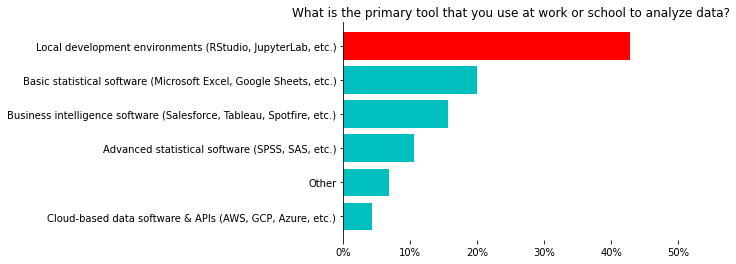

In [4]:
# What is the primary tool that you use at work or school to analyze data?
plot_ans_14(ans_14)

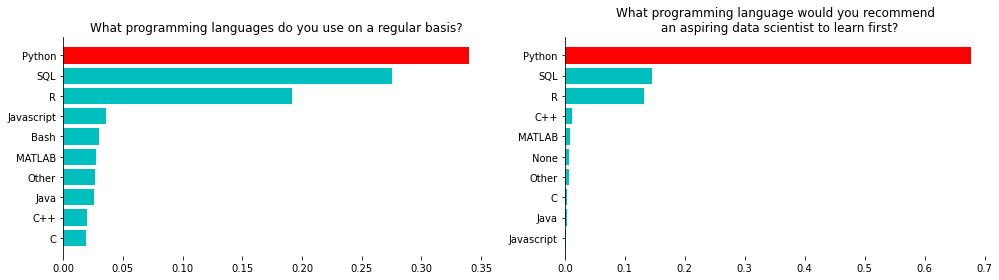

In [5]:
# What programming languages do you use on a regular basis?
# What programming language would you recommend an aspiring data scientist to learn first?
plot_ans_18_19(ans_18, ans_19)

## The plots speak loud and clear.